In [4]:
%load_ext autoreload
%autoreload 2

import os
import sys

In [6]:
# Set the repository root as a working directory 

%cd ..

/Users/mnrozhkov/dev/mlrepa-week/dvc-5-demo-project-iris


# Load  `params.yaml`

In [2]:
from src.utils.config import load_config

config = load_config('params.yaml')
config.to_dict() 

base:
  project: dvc-5-demo-project-iris

  model:
    model_name: model.joblib
    models_folder: models

  reports:
    reports_folder: reports

  random_state: 42 # random state for train/test split


data_load:
  dataset_csv: data/raw/iris.csv


featurize:
  features_path: data/processed/featured_iris.csv
  target_column: target


data_split:
  folder: experiments
  train_path: data/processed/train_iris.csv
  test_path: data/processed/test_iris.csv
  test_size: 0.3


train:
  cv: 3
  estimator_name: logreg
  estimators:

    logreg: # sklearn.linear_model.LogisticRegression
      param_grid: # params of GridSearchCV constructor
        C: [0.001]
        max_iter: [100]
        solver: ['lbfgs']
        multi_class: ['multinomial']

    svm: # sklearn.svm.SVC
      param_grid:
        C: [0.1, 1.0]
        kernel: ["rbf", "linear"]
        gamma: ["scale"]
        degree: [3, 5]

evaluate:
  metrics_file: metrics.json
  confusion_matrix_png: confusion_matrix.png
  classes_path: cla

# Load data

- src/pipelines/data_load.py

## Run as Python function 

In [11]:
from src.pipelines.data_load import data_load

data_load('params.yaml')

Data saved to: data/raw/iris.csv


## Run as Python module

In [12]:
!python src/pipelines/data_load.py --config=params.yaml

Data saved to: data/raw/iris.csv


In [13]:
%%bash 

# Raw Iris dataset saved

ls data/raw

iris.csv


# Extract features

- `src/pipelines/featurize.py`

In [20]:
from src.pipelines.featurize import featurize

featurize('params.yaml')

Features saved to: data/processed/featured_iris.csv
Features shape: (150, 7)


In [18]:
# !python src/pipelines/featurize.py --config=params.yaml

Features saved to: data/processed/featured_iris.csv
Features shape: (150, 7)


In [21]:
# Features.csv file has created

!ls data/processed

featured_iris.csv


# Split train/test dataset

- `src/pipelines/data_split.py`

In [25]:
from src.pipelines.data_split import data_split

data_split('params.yaml')

Train data saved to: data/processed/train_iris.csv
Train data shape: (105, 7)
Test data saved to: data/processed/test_iris.csv
Test data shape: (45, 7)


In [26]:
# !python src/pipelines/data_split.py --config=params.yaml

Train data saved to: data/processed/train_iris.csv
Train data shape: (105, 7)
Test data saved to: data/processed/test_iris.csv
Test data shape: (45, 7)


In [27]:
# Train and Test datsets have created

!ls data/processed/

featured_iris.csv test_iris.csv     train_iris.csv


# Train model

- `src/pipelines/train.py`

In [29]:
from src.pipelines.train import train_model

train_model('params.yaml')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
0.6208337196195589


In [13]:
# !python src/pipelines/train.py --config=params.yaml

Fitting 3 folds for each of 1 candidates, totalling 3 fits
0.6208337196195589


In [30]:
# model is created
!ls models/

model.joblib


# Evaluate model 

- add `reports/` folder 
- add `src/pipelines/evaluate.py`

F1 metrics file saved to : reports/metrics.json
Confusion matrix saved to : reports/confusion_matrix.png
Classes actual/predicted saved to : reports/classess.csv


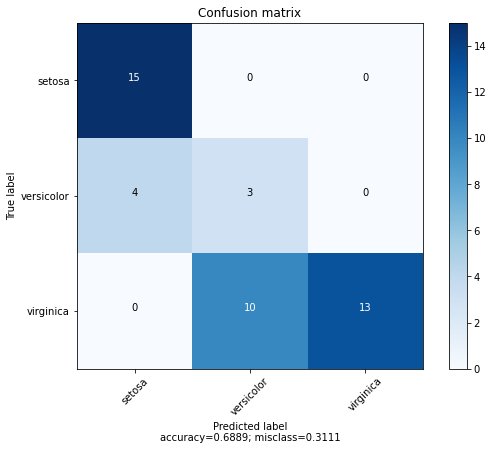

In [31]:
from src.pipelines.evaluate import evaluate_model

evaluate_model('params.yaml')

In [32]:
# !python src/pipelines/evaluate.py --config=params.yaml

F1 metrics file saved to : reports/metrics.json
Confusion matrix saved to : reports/confusion_matrix.png
Classes actual/predicted saved to : reports/classess.csv


In [33]:
# metrics file eval.txt is created
!ls reports

classess.csv         confusion_matrix.png metrics.json


In [34]:
!cat reports/metrics.json

{"f1_score": 0.6348583877995643}

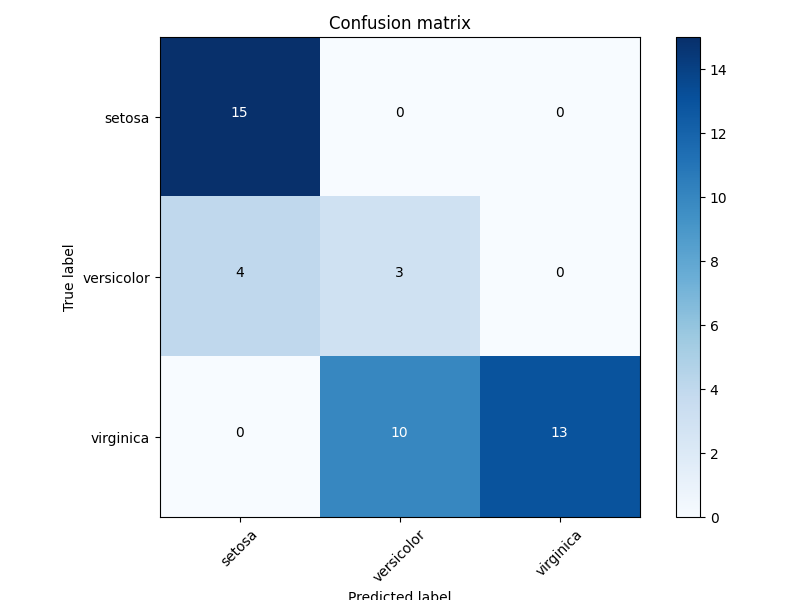

In [35]:
# Display confusion matrix

from IPython.display import Image
Image('reports/confusion_matrix.png')